In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import numpy as np
import datetime
from datetime import date, timedelta

In [5]:
url_cases = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/cases_state.csv'

shortstate = {
'Johor': 'JHR',
'Kedah': 'KDH',
'Kelantan': 'KTN',
'Melaka': 'MLK',
'Negeri Sembilan': 'NSN',
'Pahang': 'PHG',
'Perak': 'PRK',
'Perlis': 'PLS',
'Pulau Pinang': 'PNG',
'Sabah': 'SBH',
'Sarawak': 'SWK',
'Selangor': 'SEL',
'Terengganu': 'TRG',
'Sel & WP': 'GKV',
'W.P. Kuala Lumpur': 'WPKL',
'W.P. Labuan': 'LBN',
'W.P. Putrajaya': 'WPP'
}

mergeKV = {'Selangor': 'Sel & WP', 'W.P. Kuala Lumpur': 'Sel & WP', 'W.P. Putrajaya': 'Sel & WP'}

def dfIsComplete(df):
    odf = df.copy()
    dff = df.groupby(['date', 'state']) \
        .sum() \
        .unstack(fill_value=0) \
        .asfreq('D', fill_value=0) \
        .stack() \
        .sort_index(level=1) \
        .reset_index() \
        .sort_values(by=['date', 'state'])
    dff.date = dff.date.dt.date

    assert len(odf) == len(dff)


In [17]:
df = pd.read_csv(url_cases, usecols=['date','state','cases_new','cases_recovered','cases_pvax','cases_fvax'], parse_dates=['date'])
# df.state = df.state.replace(mergeKV)
df = df.groupby(['date','state']).sum().reset_index()
df = df[df.date.dt.date >= date(2021,4,19)] # start of Phase 2 vax
dfIsComplete(df)

df.head()

,date,state,cases_new,cases_recovered,cases_pvax,cases_fvax
7200,2021-04-19,Johor,115,55,1,0
7201,2021-04-19,Kedah,48,55,0,0
7202,2021-04-19,Kelantan,290,117,2,0
7203,2021-04-19,Melaka,27,12,0,0
7204,2021-04-19,Negeri Sembilan,91,28,0,0


In [19]:
df.describe()

,cases_new,cases_recovered,cases_pvax,cases_fvax
count,5200.000000,5200.000000,5200.000000,5200.000000
mean,641.566346,579.561731,77.709423,208.180577
std,1000.099460,939.197122,263.638714,359.658730
min,0.000000,0.000000,0.000000,0.000000
25%,125.000000,87.000000,1.000000,7.000000
50%,306.500000,272.000000,6.000000,84.000000
75%,710.250000,628.500000,39.000000,246.250000
max,9651.000000,9173.000000,3892.000000,3611.000000


In [7]:
url_death = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/deaths_state.csv'

In [14]:
df1 = pd.read_csv(url_death, usecols=['date','state','deaths_new','deaths_unvax','deaths_pvax','deaths_fvax','deaths_boost'], parse_dates=['date'])
# df.state = df.state.replace(mergeKV)
df1 = df1.groupby(['date','state']).sum().reset_index()
df1 = df1[df1.date.dt.date >= date(2021,4,19)] # start of Phase 2 vax
dfIsComplete(df1)

df1.head()

,date,state,deaths_new,deaths_unvax,deaths_pvax,deaths_fvax,deaths_boost
6368,2021-04-19,Johor,0,0,0,0,0
6369,2021-04-19,Kedah,0,0,0,0,0
6370,2021-04-19,Kelantan,0,0,0,0,0
6371,2021-04-19,Melaka,0,0,0,0,0
6372,2021-04-19,Negeri Sembilan,0,0,0,0,0


In [28]:
df1.describe()

,deaths_new,deaths_unvax,deaths_pvax,deaths_fvax,deaths_boost
count,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000
mean,6.176731,3.834615,1.199423,1.076154,0.051731
std,15.218601,9.613594,4.652457,1.996624,0.326753
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,0.000000,0.000000
75%,6.000000,3.000000,1.000000,1.000000,0.000000
max,359.000000,119.000000,68.000000,18.000000,6.000000


In [25]:
full_data = pd.merge(df, df1)

In [57]:
full_data.tail()

,date,state,cases_new,cases_recovered,cases_pvax,cases_fvax,deaths_new,deaths_unvax,deaths_pvax,deaths_fvax,deaths_boost
5195,2022-03-09,Selangor,6606,6654,119,1893,22,0,0,0,0
5196,2022-03-09,Terengganu,1283,680,16,560,4,0,0,0,0
5197,2022-03-09,W.P. Kuala Lumpur,2856,1674,66,579,2,0,0,0,0
5198,2022-03-09,W.P. Labuan,246,402,7,64,0,0,0,0,0
5199,2022-03-09,W.P. Putrajaya,140,184,2,35,0,0,0,0,0


In [27]:
full_data.describe()

,cases_new,cases_recovered,cases_pvax,cases_fvax,deaths_new,deaths_unvax,deaths_pvax,deaths_fvax,deaths_boost
count,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000
mean,641.566346,579.561731,77.709423,208.180577,6.176731,3.834615,1.199423,1.076154,0.051731
std,1000.099460,939.197122,263.638714,359.658730,15.218601,9.613594,4.652457,1.996624,0.326753
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,125.000000,87.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,306.500000,272.000000,6.000000,84.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,710.250000,628.500000,39.000000,246.250000,6.000000,3.000000,1.000000,1.000000,0.000000
max,9651.000000,9173.000000,3892.000000,3611.000000,359.000000,119.000000,68.000000,18.000000,6.000000


In [30]:
full_data.isna().sum()

date               0
state              0
cases_new          0
cases_recovered    0
cases_pvax         0
cases_fvax         0
deaths_new         0
deaths_unvax       0
deaths_pvax        0
deaths_fvax        0
deaths_boost       0
dtype: int64

In [31]:
full_data['date'] = pd.to_datetime(full_data['date'])

Text(0, 0.5, 'Daily new deaths')

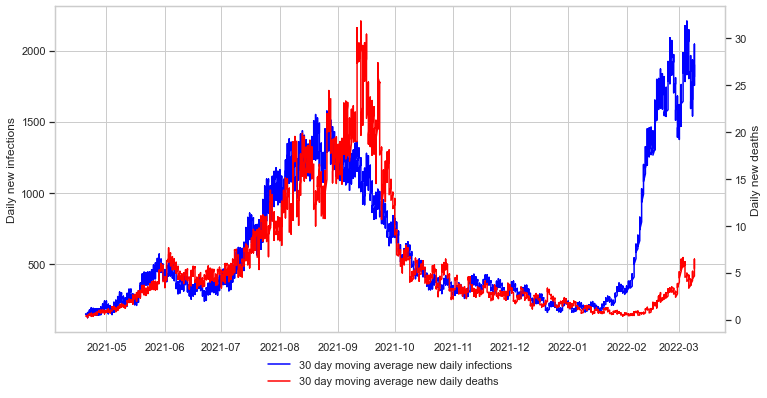

In [83]:
fig,ax = plt.subplots(figsize=(12,6))

rolling_avg = 30 # number of days to use for rolling average - probably should be multiple of 7

ax.plot(full_data.date,full_data['cases_new'].rolling(window=rolling_avg).mean(),color='blue',label='30 day moving average new daily infections')
sns.set()
sns.set_style("whitegrid")
ax.set_ylabel('Daily new infections')

ax2=ax.twinx()
ax2.plot(full_data.date, full_data["deaths_new"].rolling(window=rolling_avg).mean(), color="red",label='30 day moving average new daily deaths')
leg = ax.legend(loc='center', frameon=False,bbox_to_anchor=(0.5, -0.10))
leg2=ax2.legend(loc='center', frameon=False,bbox_to_anchor=(0.49, -0.15))
ax2.grid(False) # turn off grid for second Y axis
ax2.set_ylabel('Daily new deaths')

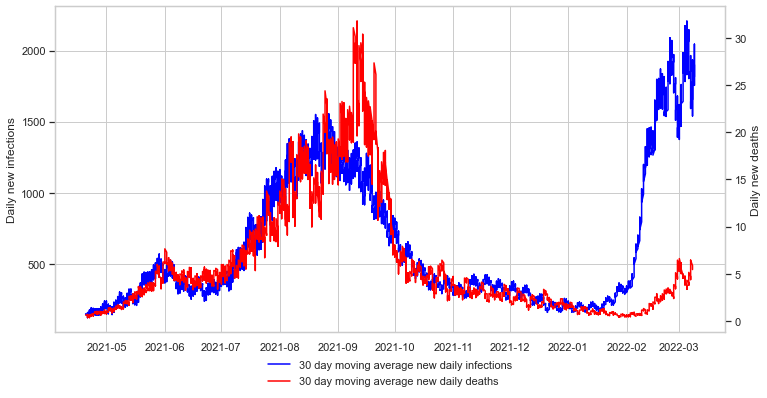

In [84]:
lag = -30 # number of days from current day that prediction factor occurs
fig,ax = plt.subplots(figsize=(12,6))
ax.plot(full_data.date,full_data['cases_new'].rolling(window=rolling_avg).mean(),color='blue',label='30 day moving average new daily infections')
ax.set_ylabel('Daily new infections')
ax2=ax.twinx()
ax2.plot(full_data.date, full_data["deaths_new"].shift(lag).rolling(window=rolling_avg).mean(), color="red",label='30 day moving average new daily deaths')
ax2.grid(False) # turn off grid for second Y axis
ax2.set_ylabel('Daily new deaths')
leg = ax.legend(loc='center', frameon=False,bbox_to_anchor=(0.5, -0.10))
leg2=ax2.legend(loc='center', frameon=False,bbox_to_anchor=(0.49, -0.15))

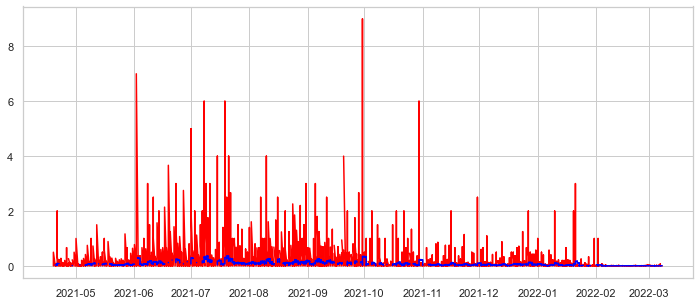

In [86]:
# calculate relationship between lagged new daily infections and current daily deaths
full_data["death_prediction_scalar"] = full_data["deaths_new"].shift(lag)/full_data["cases_new"] # lags deaths back in time by the lag value for this calculation
fig,ax = plt.subplots(figsize=(12,5))
sns.set()
sns.set_style("whitegrid")
ax.plot(df.date,full_data['death_prediction_scalar'],color='red')
ax.plot(df.date, full_data["death_prediction_scalar"].rolling(window=rolling_avg).mean(), color="blue")